In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

# Підключаємо зображення
img = Image.open('black_hole.jpg')
img_data = np.array(img)

In [4]:
# Перетворюємо 3D масив (висота, ширина, RGB) у 2D масив пікселів
w, h, d = tuple(img_data.shape)
pixels = np.reshape(img_data, (w * h, d))

def quantize_image(pixel_data, n_colors):
    # Навчаємо k-means знаходити n_colors основних кольорів
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pixel_data)
    colors = kmeans.cluster_centers_.astype('uint8')

    # Замінюємо кожен піксель на колір найближчого центроїда
    quantized_pixels = colors[labels]
    return np.reshape(quantized_pixels, (w, h, d))

In [5]:
# Квантування для різних рівнів
levels = [64, 32, 16, 8]
results = {}

print("Початок квантування.")
for k in levels:
    results[k] = quantize_image(pixels, k)
    print(f"Завершено для {k} кольорів")

Початок квантування.
Завершено для 64 кольорів
Завершено для 32 кольорів
Завершено для 16 кольорів
Завершено для 8 кольорів


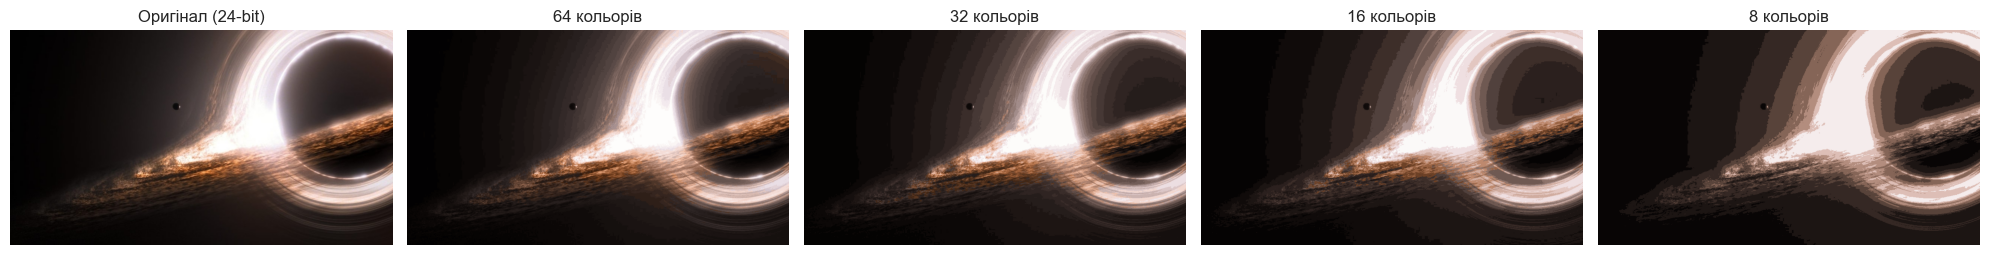

In [6]:
# Візуалізація результатів
plt.figure(figsize=(20, 10))

# Оригінал
plt.subplot(1, 5, 1)
plt.imshow(img_data)
plt.title("Оригінал (24-bit)")
plt.axis('off')

# Квантовані версії
for i, k in enumerate(levels):
    plt.subplot(1, 5, i + 2)
    plt.imshow(results[k])
    plt.title(f"{k} кольорів")
    plt.axis('off')

plt.tight_layout()
plt.show()